# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. **Do not forget, this is a Classification problem!**

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Check if is there any overfitting and underfitting. Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

## **Fenil Maisuria**

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

In [3]:
df = pd.read_csv('winequality.csv')
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.isin(['?']).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

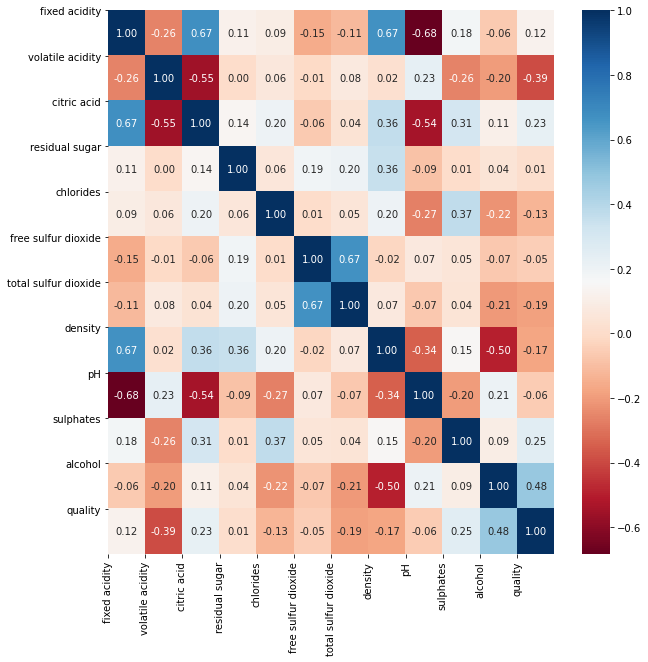

In [9]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [10]:
#sns.pairplot(df)
#plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

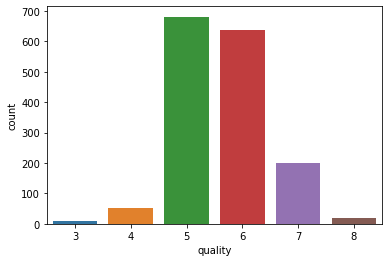

In [11]:
# Our label distribution (countplot)
sns.countplot(x='quality', data=df)

/home/fenil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

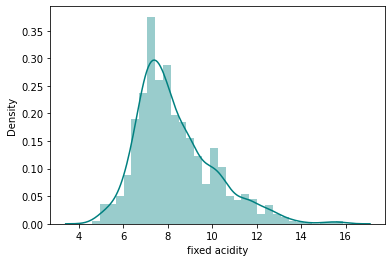

In [12]:
# Example EDA (distplot)
sns.distplot(df['fixed acidity'], color='teal')

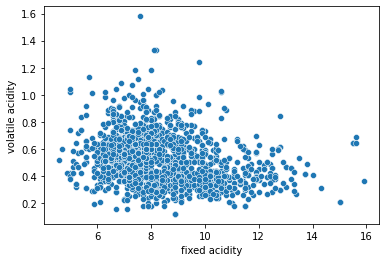

In [13]:
sns.scatterplot(x=df['fixed acidity'], y=df['volatile acidity']);

<AxesSubplot:xlabel='total sulfur dioxide'>

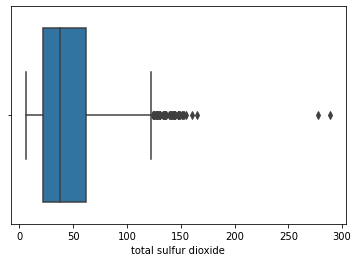

In [14]:
sns.boxplot(x=df['total sulfur dioxide'])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [15]:
df.duplicated().sum()

240

In [16]:
df.loc[df.duplicated(), :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [17]:
dfclean = df.drop_duplicates().reset_index(drop = False)
dfclean = dfclean.drop(['index'], axis=1)
dfclean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [18]:
from scipy import stats
import numpy as np

In [19]:
z = np.abs(stats.zscore(dfclean))
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

127

In [20]:
dfclean.shape

(1359, 12)

In [21]:
dfclean = dfclean.drop(outliers,axis = 0).reset_index(drop = False)
dfclean = dfclean.drop(['index'], axis=1)
dfclean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


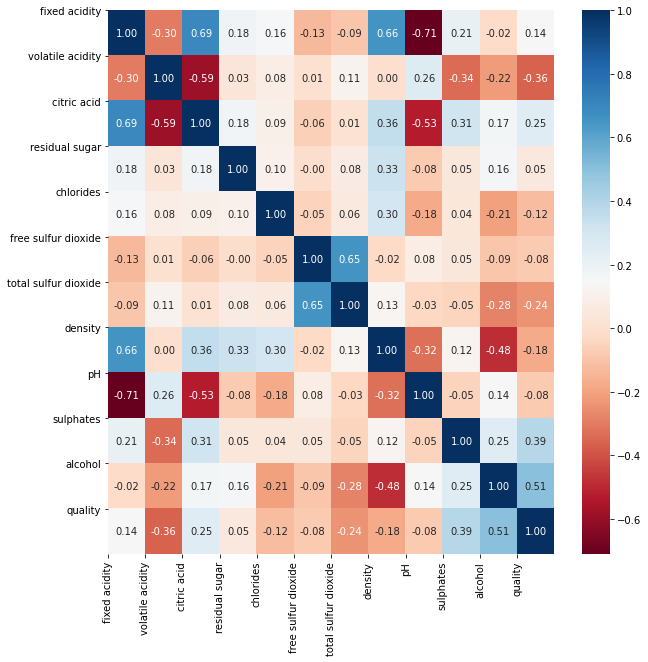

In [22]:
corr = dfclean.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [23]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
print("Shape of X : ",X.shape)
print("Shape of X : ",y.shape)

Shape of X :  (1599, 11)
Shape of X :  (1599, 1)


In [24]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [25]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [26]:
# Clean Dataset(Remove Duplicates and Outliers)
X_clean = dfclean.iloc[:, :-1]
y_clean = dfclean.iloc[:, -1:]
print("Shape of X : ",X_clean.shape)
print("Shape of X : ",y_clean.shape)

Shape of X :  (1232, 11)
Shape of X :  (1232, 1)


In [27]:
X_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [28]:
y_clean.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=54)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119, 1)
(480, 1)


In [31]:
# Clean Dataset (Remove Duplicates and Outliers)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size = 0.3, random_state=54)

print(X_train_clean.shape)
print(X_test_clean.shape)
print(y_train_clean.shape)
print(y_test_clean.shape)

(862, 11)
(370, 11)
(862, 1)
(370, 1)


## DecisionTree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

#### Without Clean Data

In [33]:

model = DecisionTreeClassifier(max_depth=6, random_state=54)
model.fit(X_train,y_train)
print("Accuracy of train:",model.score(X_train,y_train))
print("Accuracy of test:",model.score(X_test,y_test))

Accuracy of train: 0.7024128686327078
Accuracy of test: 0.5708333333333333


In [34]:
pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.12      0.09      0.11        11
           5       0.64      0.65      0.64       207
           6       0.52      0.57      0.54       187
           7       0.59      0.51      0.55        65
           8       0.00      0.00      0.00         7

    accuracy                           0.57       480
   macro avg       0.31      0.30      0.31       480
weighted avg       0.56      0.57      0.57       480



In [35]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.31250698046363684
Recall = 0.3021315522594295
Accuracy = 0.5708333333333333
F1 Score = 0.30619132684518335


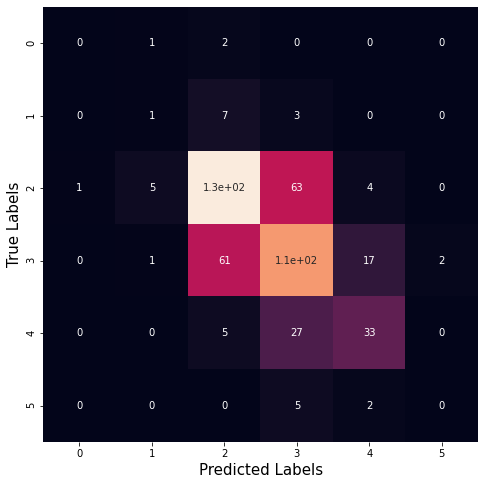

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### With Clean Data

In [58]:
model = DecisionTreeClassifier(max_depth=6, random_state=54)
model.fit(X_train,y_train.values.ravel())
print("Accuracy of train:",model.score(X_train_clean,y_train_clean))
print("Accuracy of test:",model.score(X_test_clean,y_test_clean))

Accuracy of train: 0.6461716937354989
Accuracy of test: 0.654054054054054


In [59]:
pred = model.predict(X_test_clean)
print(classification_report(y_test_clean,pred))

              precision    recall  f1-score   support

           4       0.67      0.22      0.33         9
           5       0.70      0.72      0.71       143
           6       0.61      0.68      0.64       159
           7       0.67      0.58      0.62        50
           8       0.00      0.00      0.00         9

    accuracy                           0.65       370
   macro avg       0.53      0.44      0.46       370
weighted avg       0.64      0.65      0.64       370



/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
print("Precision = {}".format(precision_score(y_test_clean, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test_clean, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test_clean, pred)))
print("F1 Score = {}".format(f1_score(y_test_clean, pred,average='macro')))

Precision = 0.5301335161800278
Recall = 0.44034944510416213
Accuracy = 0.654054054054054
F1 Score = 0.46193382935670835


/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


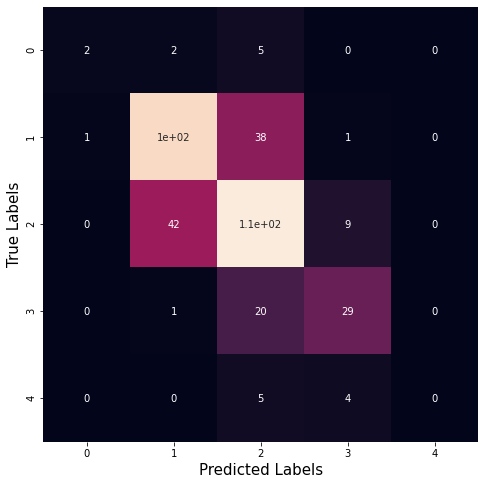

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_clean, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## Suport Vector Classifier

In [41]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [57]:
modelsvc = SVC(random_state=54)
modelsvc.fit(X_train,y_train.values.ravel())

SVC(random_state=54)

In [43]:
print("Accuracy of train:",modelsvc.score(X_train,y_train))
print("Accuracy of test:",modelsvc.score(X_test,y_test))

Accuracy of train: 0.5138516532618409
Accuracy of test: 0.4895833333333333


In [44]:
pred2 = modelsvc.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.64      0.44      0.52       207
           6       0.43      0.77      0.55       187
           7       0.00      0.00      0.00        65
           8       0.00      0.00      0.00         7

    accuracy                           0.49       480
   macro avg       0.18      0.20      0.18       480
weighted avg       0.44      0.49      0.44       480



/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


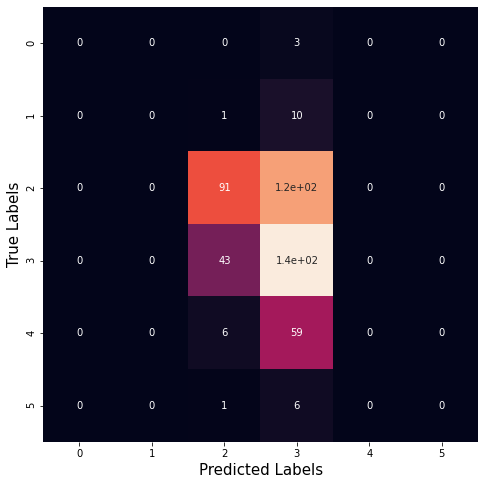

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred2)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)

ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [46]:
print("Precision = {}".format(precision_score(y_test, pred2, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred2, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred2)))
print("F1 Score = {}".format(f1_score(y_test, pred2,average='macro')))

Precision = 0.1778134288968525
Recall = 0.20161116708431284
Accuracy = 0.4895833333333333
F1 Score = 0.17834356665302223


/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### With Clean Data

In [56]:
modelsvc = SVC(random_state=54)
modelsvc.fit(X_train_clean,y_train_clean.values.ravel())

SVC(random_state=54)

In [48]:
print("Accuracy of train:",modelsvc.score(X_train_clean,y_train_clean))
print("Accuracy of test:",modelsvc.score(X_test_clean,y_test_clean))

Accuracy of train: 0.4988399071925754
Accuracy of test: 0.5


In [49]:
pred2 = modelsvc.predict(X_test_clean)
print(classification_report(y_test_clean,pred2))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.57      0.49      0.53       143
           6       0.47      0.72      0.57       159
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         9

    accuracy                           0.50       370
   macro avg       0.21      0.24      0.22       370
weighted avg       0.42      0.50      0.45       370



/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


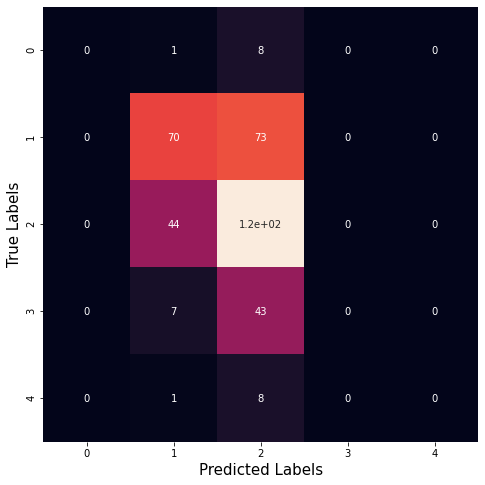

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_clean, pred2)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)

ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [51]:
print("Precision = {}".format(precision_score(y_test_clean, pred2, average='macro')))
print("Recall = {}".format(recall_score(y_test_clean, pred2, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test_clean, pred2)))
print("F1 Score = {}".format(f1_score(y_test_clean, pred2,average='macro')))

Precision = 0.2069385471182647
Recall = 0.24255618595241235
Accuracy = 0.5
F1 Score = 0.21856365050557428


/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train.values.ravel())

KNeighborsClassifier()

In [70]:
print("Accuracy of train:",model.score(X_train,y_train))
print("Accuracy of test:",model.score(X_test,y_test))

Accuracy of train: 0.6559428060768543
Accuracy of test: 0.47291666666666665


In [71]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.51      0.67      0.58       207
           6       0.42      0.41      0.42       187
           7       0.50      0.17      0.25        65
           8       0.00      0.00      0.00         7

    accuracy                           0.47       480
   macro avg       0.24      0.21      0.21       480
weighted avg       0.45      0.47      0.45       480



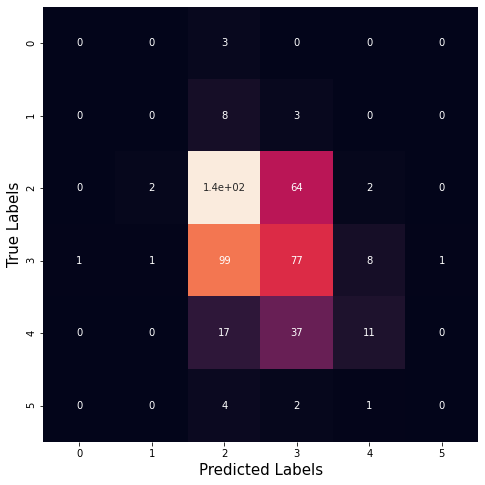

In [72]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)

ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [73]:
print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("F1 Score = {}".format(f1_score(y_test, y_pred,average='macro')))

Precision = 0.23926330702286988
Recall = 0.2087488432756975
Accuracy = 0.47291666666666665
F1 Score = 0.2086498339588775


#### With Clean Data

In [74]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_clean,y_train_clean.values.ravel())

KNeighborsClassifier()

In [75]:
print("Accuracy of train:",model.score(X_train_clean,y_train_clean))
print("Accuracy of test:",model.score(X_test_clean,y_test_clean))

Accuracy of train: 0.6310904872389791
Accuracy of test: 0.45675675675675675


In [76]:
y_pred = model.predict(X_test_clean)
print(classification_report(y_test_clean,y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.47      0.66      0.55       143
           6       0.47      0.43      0.45       159
           7       0.29      0.12      0.17        50
           8       0.00      0.00      0.00         9

    accuracy                           0.46       370
   macro avg       0.24      0.24      0.23       370
weighted avg       0.42      0.46      0.43       370



/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


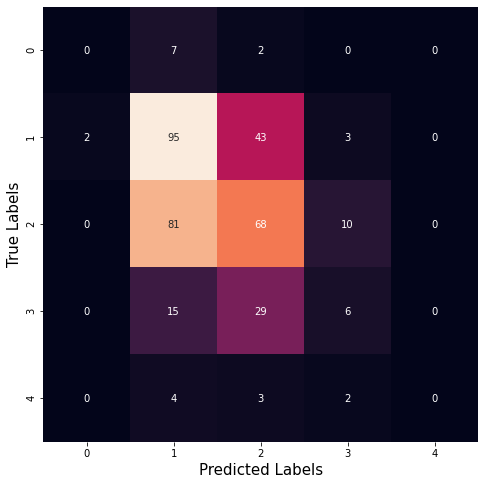

In [77]:
cm = confusion_matrix(y_test_clean, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)

ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [78]:
print("Precision = {}".format(precision_score(y_test_clean, y_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test_clean, y_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test_clean, y_pred)))
print("F1 Score = {}".format(f1_score(y_test_clean, y_pred,average='macro')))

Precision = 0.24499536653172704
Recall = 0.24240172406210148
Accuracy = 0.45675675675675675
F1 Score = 0.23342142864816667


/home/fenil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.